# Import Library

In [4]:
import numpy as np
import os
from glob import glob
import torch
import torch.nn as nn
import cv2
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from keras.layers import Dropout

# Load Dataset

In [3]:
# num_of_train_samples = 3000
# num_of_test_samples = 600

# trdata = ImageDataGenerator()
# traindata = trdata.flow_from_directory(directory="../input/brain-tumor-detection/brain tumor detection/",target_size=(224,224), class_mode="categorical")
# tsdata = ImageDataGenerator()
# testdata = tsdata.flow_from_directory(directory="../input/brain-tumor-detection/brain tumor detection/", target_size=(224,224), class_mode="categorical")
#                     image =  cv2.resize(cv2.imread(os.path.join(curr_path, img)), (224, 224))

In [4]:
path = ['../input/brain-tumor-detection/']

In [5]:
# Load dataset
class LoadDataset:
    def get_data(data_paths):
        images = [] # images
        y = [] # labels
        labels = ['yes', 'no']
        for data_path in data_paths:
            for label in labels:
                curr_path = data_path + label
                for img in os.listdir(curr_path):
                    image = cv2.resize(cv2.imread(os.path.join(curr_path, img), 0), (224, 224))
                    images.append(image)
                    if (label == 'yes'):
                        y.append(1)
                    elif (label == 'no'):
                        y.append(0)

        images = np.array(images)
        y = to_categorical(y)
        return images,y

In [6]:
x,y = LoadDataset.get_data(path)
print("Load Dataset done")

Load Dataset done


In [7]:
# Split dataset to 80% training and 20% testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state = 42,shuffle = True)
# Expand the shape of an array
xtrain = np.expand_dims(xtrain, axis=-1) #-1 means expand the LAST axis
xtest = np.expand_dims(xtest, axis=-1) #-1 means expand the LAST axis

print("X_train shape: {}".format(xtrain.shape))
print("X_test shape: {}".format(xtest.shape))
print("y_train shape: {}".format(ytrain.shape))
print("y_test shape: {}".format(ytest.shape))

X_train shape: (2400, 224, 224, 1)
X_test shape: (600, 224, 224, 1)
y_train shape: (2400, 2)
y_test shape: (600, 2)


# Manual Calculation

In [8]:
import random

print(round(random.uniform(0, 1), 3))

0.502


Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


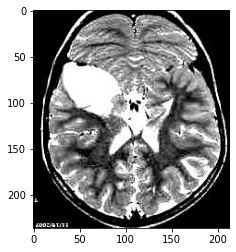

In [9]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../input/brain-tumor-detection/yes/y13.jpg')
imgplot = plt.imshow(img)
plt.show()

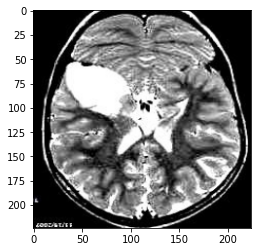

In [10]:
resized_image = cv2.resize(img, (224, 224)) 
imgplot = plt.imshow(resized_image)
plt.show()

Populating the interactive namespace from numpy and matplotlib


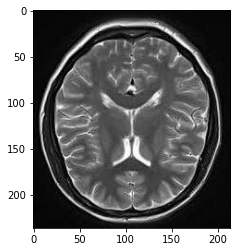

In [11]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img2 = mpimg.imread('../input/brain-tumor-detection/no/no11.jpg')
imgplot = plt.imshow(img2)
plt.show()

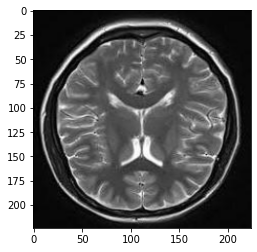

In [12]:
resized_image2 = cv2.resize(img2, (224, 224)) 
imgplot = plt.imshow(resized_image2)
plt.show()

In [13]:
# input matrix shape
image_path = '../input/brain-tumor-detection/yes/y13.jpg'
image = cv2.imread(image_path, 0)
image.shape

(236, 213)

# Print and Display Input Matrix

In [14]:
# display input matrix
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
image_df = pd.DataFrame(image)
image_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,3,7,0,0,1,1,2,0,8,232,249,255,249,255,221,128,39,0,0,5,5,0,0,6,8,0,0,0,9,1,0,0,1,3,3,0,0,0,0,1,3,3,2,1,0,5,0,0,0,2,0,0,0,0,0,8,0,1,5,0,4,0,4,8,0,0,3,5,0,0,5,7,0,0,1,3,0,0,0,2,0,0,4,6,0,2,0,0,3,0,0,32,74,167,255,254,249,255,255,247,151,78,0,8,0,1,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,4,0,0,10,5,1,3,0,21,255,255,255,248,255,163,66,0,2,24,11,0,0,2,2,0,0,0,5,0,0,3,1,0,0,0,0,3,5,2,2,1,0,0,0,2,2,0,2,6,4,0,0,1,11,8,0,0,2,12,0,1,10,14,0,0,0,6,5,0,0,0,2,1,0,0,4,3,0,1,7,8,1,0,3,5,3,0,2,8,6,0,0,0,1,35,122,244,255,254,255,251,255,219,117,3,1,2,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,0,0,18,0,4,124,255,246,243,255,202,95,12,0,0,0,0,0,0,7,0,2,4,3,2,3,5,6,0,0,4,6,4,0,0,0,5,4,2,0,0,0,2,3,4,2,0,0,1,2,0,0,0,0,18,1,0,1,0,5,2,0,5,10,1,0,0,16,0,2,2,0,0,0,0,0,0,2,1,0,0,0,0,0,0,6,4,0,0,6,11,7,2,0,96,142,189,252,241,255,255,255,190,5,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,4,10,0,13,44,209,251,254,255,231,123,69,0,0,8,14,0,0,4,7,0,0,0,0,7,0,0,0,7,5,5,2,0,0,0,0,6,0,0,0,2,2,1,0,0,0,0,2,0,0,0,6,11,8,0,0,0,0,28,5,0,0,0,0,0,5,8,1,0,0,0,3,3,0,0,0,4,0,1,0,0,8,5,0,7,0,2,1,0,0,0,0,0,0,17,10,0,18,153,255,249,255,237,255,188,37,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,12,0,2,0,32,243,255,233,255,196,0,3,0,0,10,0,0,0,4,0,0,0,14,2,0,0,4,3,0,0,0,0,0,0,14,52,99,133,112,115,116,112,100,83,65,54,9,3,0,0,1,6,0,0,6,10,0,14,0,0,1,0,6,5,2,0,0,0,0,3,10,0,0,0,6,6,0,0,19,6,0,0,0,0,0,0,3,0,0,2,6,5,8,13,6,0,0,15,0,0,115,165,252,255,253,255,206,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,57,250,255,255,252,119,21,19,3,0,14,0,0,0,8,2,0,0,10,0,0,4,0,0,7,7,0,0,59,149,216,230,194,140,102,199,204,210,211,202,185,166,154,163,112,47,4,0,0,0,3,0,0,84,199,255,255,122,13,0,0,0,5,3,17,85,161,146,105,78,91,117,118,95,74,88,48,22,14,4,2,6,3,7,0,0,3,2,0,0,0,0,0,5,9,0,3,5,0,99,254,253,253,250,255,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,147,255,233,254,247,91,20,3,0,6,0,3,2,2,0,0,3,12,5,0,3,0,0,5,34,93,178,246,255,218,150,91,68,91,139,177,96,105,120,133,140,141,136,132,160,161,165,155,111,49,6,0,16,3,109,245,255,247,79,0,0,25,112,200,226,203,194,212,200,160,135,151,178,179,162,149,166,115,103,106,84,86,101,91,0,0,0,0,

# Class Preprocessing

In [15]:
# Augmentation
class Preprocessing:
    def augmentation(xtrain, ytrain):
        train_generator = ImageDataGenerator(
                rescale = 1./255,
                shear_range = 0.2,
                zoom_range=0.2,
                horizontal_flip=True,
            ).flow(
                xtrain,
                ytrain,
                batch_size=32
            )

        return train_generator,test_generator

# Class VGG16

In [16]:
# VGG16 without dropout
class VGG16:
    def build():
        model = Sequential()
        # 1st block
        model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
        model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 2nd block
        model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 3rd block
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 4th block
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 5th block
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # FC Layers 1
        model.add(Flatten())
        model.add(Dense(units=4096,activation="relu"))
        # FC Layers 2
        model.add(Dense(units=4096,activation="relu"))
        # Sigmoid Classifier
        model.add(Dense(units=2, activation="softmax"))
        return model
    
    def build_norm():
        model = Sequential()
        # 1st block
        model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 2nd block
        model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 3rd block
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 4th block
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # 5th block
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
        # FC Layers 1
        model.add(Flatten())
        model.add(Dense(units=4096,activation="relu"))
        model.add(layers.BatchNormalization())
        # FC Layers 2
        model.add(Dense(units=4096,activation="relu"))
        model.add(layers.BatchNormalization())
        # Sigmoid Classifier
        model.add(Dense(units=2, activation="softmax"))
        return model

In [17]:
initializer = tf.keras.initializers.GlorotUniform()
values = initializer(shape=(3, 3))
print(values)

tf.Tensor(
[[ 0.28000188  0.01108503 -0.33393383]
 [-0.16478205 -0.67587304  0.99289966]
 [-0.50711846  0.76271343 -0.8719723 ]], shape=(3, 3), dtype=float32)


In [18]:
initializer = tf.keras.initializers.RandomUniform(minval=-0.408248290463863, maxval=0.408248290463863)
values = initializer(shape=(3, 3))
print(values)

tf.Tensor(
[[ 0.0532307   0.14338249 -0.30015278]
 [-0.4001725   0.11022723 -0.02279007]
 [-0.18112676 -0.08209956  0.22729146]], shape=(3, 3), dtype=float32)


# Class Evaluation

In [22]:
class Evaluation:  
    def confusion_matrix(xtest, ytest):
      y_test_hat = model.predict(xtest, batch_size=64)
      y_test_hat = np.argmax(y_test_hat, axis=1)
      y_test = np.argmax(ytest, axis=1)  

      # plot confusion matrix as heatmap
      conf_m = confusion_matrix(y_test, y_test_hat)
      plt.figure(figsize=(5,5))
      sns.set(font_scale=1.2)
      ax = sns.heatmap(conf_m, annot=True,xticklabels=['N', 'T'], yticklabels=['N', 'T'], cbar=False, cmap="YlGnBu",linewidths=1, linecolor='black', fmt='.0f')
      plt.yticks(rotation=0)
      plt.xlabel('Predicted labels')
      plt.ylabel('Actual labels')
      ax.xaxis.set_ticks_position('top') 
      plt.title('Confusion matrix - test data\n(N - normal, T - tumor)')
      plt.show()
      return plt

    def classification_report(xtest, ytest):
      y_test_hat = model.predict(xtest, batch_size=64)
      y_test_hat = np.argmax(y_test_hat, axis=1)
      y_test = np.argmax(ytest, axis=1) 
      
      clas_r = classification_report(y_test, y_test_hat)
      return clas_r

# Model Spec

In [23]:
model = VGG16.build() 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

# Train & Evaluation

In [24]:
# from tensorflow.keras.optimizers import RMSprop
# opt = RMSprop(learning_rate=0.001)
# steps_per_epoch=num_of_train_samples // batch_size
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
# hist = model.fit(xtrain, ytrain, epochs=20, validation_data=(testdata), shuffle = 1, callbacks=[checkpoint,early])

## Without Data Augmentation 

## Learning Rate = 0.001

In [25]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

### Epoch = 50

#### Batch Size = 64

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(xtrain, ytrain, verbose=True, batch_size=64, epochs=50, validation_data=(xtest, ytest), callbacks=[checkpoint, early])

Epoch 1/50
38/38 [==============================] - 36s 599ms/step - loss: 28.8569 - accuracy: 0.5163 - val_loss: 0.6726 - val_accuracy: 0.6433

Epoch 00001: val_accuracy improved from -inf to 0.64333, saving model to vgg16_1.h5
Epoch 2/50
38/38 [==============================] - 16s 421ms/step - loss: 0.7107 - accuracy: 0.5688 - val_loss: 0.6123 - val_accuracy: 0.6917

Epoch 00002: val_accuracy improved from 0.64333 to 0.69167, saving model to vgg16_1.h5
Epoch 3/50
38/38 [==============================] - 16s 420ms/step - loss: 0.5653 - accuracy: 0.7350 - val_loss: 0.5279 - val_accuracy: 0.7383

Epoch 00003: val_accuracy improved from 0.69167 to 0.73833, saving model to vgg16_1.h5
Epoch 4/50
38/38 [==============================] - 16s 420ms/step - loss: 0.5125 - accuracy: 0.7508 - val_loss: 0.4789 - val_accuracy: 0.7583

Epoch 00004: val_accuracy improved from 0.73833 to 0.75833, saving model to vgg16_1.h5
Epoch 5/50
38/38 [==============================] - 16s 421ms/step - loss: 0.4

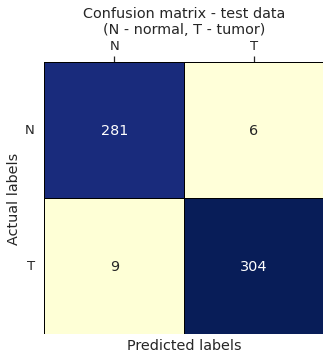

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       287
           1       0.98      0.97      0.98       313

    accuracy                           0.97       600
   macro avg       0.97      0.98      0.97       600
weighted avg       0.98      0.97      0.98       600



In [27]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

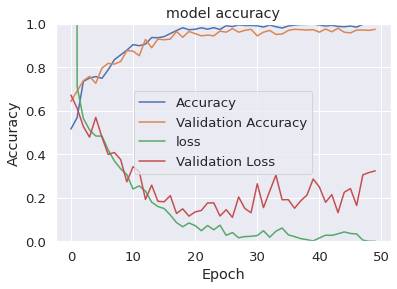

In [28]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

### Batch Size = 128

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(xtrain, ytrain, verbose=True, batch_size=128, epochs=50, validation_data=(xtest, ytest), callbacks=[checkpoint, early])

Epoch 1/50
19/19 [==============================] - 42s 2s/step - loss: 2.7342e-05 - accuracy: 1.0000 - val_loss: 0.3259 - val_accuracy: 0.9717

Epoch 00001: val_accuracy improved from -inf to 0.97167, saving model to vgg16_1.h5
Epoch 2/50
19/19 [==============================] - 16s 826ms/step - loss: 2.2813e-05 - accuracy: 1.0000 - val_loss: 0.3302 - val_accuracy: 0.9717

Epoch 00002: val_accuracy did not improve from 0.97167
Epoch 3/50
19/19 [==============================] - 16s 826ms/step - loss: 1.9787e-05 - accuracy: 1.0000 - val_loss: 0.3352 - val_accuracy: 0.9717

Epoch 00003: val_accuracy did not improve from 0.97167
Epoch 4/50
19/19 [==============================] - 16s 825ms/step - loss: 1.7379e-05 - accuracy: 1.0000 - val_loss: 0.3383 - val_accuracy: 0.9717

Epoch 00004: val_accuracy did not improve from 0.97167
Epoch 5/50
19/19 [==============================] - 16s 825ms/step - loss: 1.5078e-05 - accuracy: 1.0000 - val_loss: 0.3418 - val_accuracy: 0.9717

Epoch 00005: v

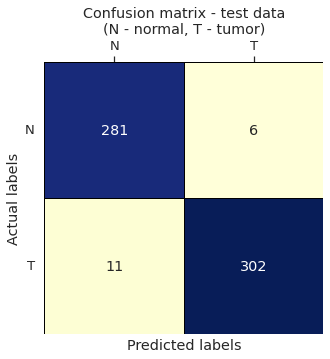

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       287
           1       0.98      0.96      0.97       313

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [30]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

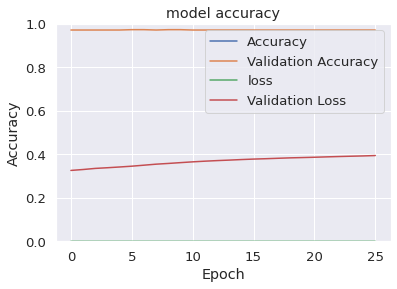

In [31]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

## Epoch = 100

### Batch Size = 64

In [32]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(xtrain, ytrain, verbose=True, batch_size=64, epochs=100, validation_data=(xtest, ytest), callbacks=[checkpoint, early])

Epoch 1/100
38/38 [==============================] - 16s 422ms/step - loss: 1.7300e-06 - accuracy: 1.0000 - val_loss: 0.3983 - val_accuracy: 0.9717

Epoch 00001: val_accuracy improved from -inf to 0.97167, saving model to vgg16_1.h5
Epoch 2/100
38/38 [==============================] - 16s 421ms/step - loss: 1.5335e-06 - accuracy: 1.0000 - val_loss: 0.4030 - val_accuracy: 0.9717

Epoch 00002: val_accuracy did not improve from 0.97167
Epoch 3/100
38/38 [==============================] - 16s 420ms/step - loss: 1.3070e-06 - accuracy: 1.0000 - val_loss: 0.4071 - val_accuracy: 0.9717

Epoch 00003: val_accuracy did not improve from 0.97167
Epoch 4/100
38/38 [==============================] - 16s 420ms/step - loss: 1.1174e-06 - accuracy: 1.0000 - val_loss: 0.4165 - val_accuracy: 0.9717

Epoch 00004: val_accuracy did not improve from 0.97167
Epoch 5/100
38/38 [==============================] - 16s 420ms/step - loss: 9.2533e-07 - accuracy: 1.0000 - val_loss: 0.4240 - val_accuracy: 0.9717

Epoch 

KeyboardInterrupt: 

In [ ]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

### Batch Size = 128

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(xtrain, ytrain, verbose=True, batch_size=128, epochs=100, validation_data=(xtest, ytest), callbacks=[checkpoint, early])

In [ ]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

### Learning Rate = 0.01

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

### Epoch = 50

### Batch Size = 64

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(xtrain, ytrain, verbose=True, batch_size=64, epochs=50, validation_data=(xtest, ytest), callbacks=[checkpoint, early])

In [ ]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

### Batch Size = 128

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(xtrain, ytrain, verbose=True, batch_size=128, epochs=50, validation_data=(xtest, ytest), callbacks=[checkpoint, early])

In [ ]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

### Epoch = 100

### Batch Size = 64

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(xtrain, ytrain, verbose=True, batch_size=64, epochs=100, validation_data=(xtest, ytest), callbacks=[checkpoint, early])

In [ ]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

### Batch Size = 128

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(xtrain, ytrain, verbose=True, batch_size=128, epochs=100, validation_data=(xtest, ytest), callbacks=[checkpoint, early])

In [ ]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

## Learning Rate = 0.0001

In [ ]:
model = VGG16.build() 
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

### Epoch = 50

### Batch Size = 64

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(xtrain, ytrain, verbose=True, batch_size=64, epochs=50, validation_data=(xtest, ytest), callbacks=[checkpoint, early])

In [ ]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

### Batch Size = 128

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(xtrain, ytrain, verbose=True, batch_size=128, epochs=50, validation_data=(xtest, ytest), callbacks=[checkpoint, early])

In [ ]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

### Epoch = 100

### Batch Size = 64

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(xtrain, ytrain, verbose=True, batch_size=64, epochs=100, validation_data=(xtest, ytest), callbacks=[checkpoint, early])

In [ ]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

### Batch Size = 128

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(xtrain, ytrain, verbose=True, batch_size=128, epochs=100, validation_data=(xtest, ytest), callbacks=[checkpoint, early])

In [ ]:
heatmaps = Evaluation.confusion_matrix(xtest, ytest)
print(heatmaps)

reports = Evaluation.classification_report(xtest, ytest)
print(reports)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

## Probability = 0.25

### Learning Rate = 0.01

In [ ]:
model = VGG16.build_dropout(0.25)
opt = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Epoch = 50

### Batch Size = 64

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, verbose=True, batch_size=64, epochs=50, validation_data=(testdata))

### Batch Size = 128

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, verbose=True, batch_size=128, epochs=50, validation_data=(testdata))

### Epoch = 100

### Batch Size = 64

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, verbose=True, batch_size=64, epochs=100, validation_data=(testdata))

### Batch Size = 128

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, verbose=True, batch_size=128, epochs=100, validation_data=(testdata))

### Learning Rate = 0.001

In [ ]:
model = VGG16.build_dropout(0.25)
opt = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Epoch = 50

### Batch Size = 64

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, verbose=True, batch_size=64, epochs=50, validation_data=(testdata))

### Batch Size = 128

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, verbose=True, batch_size=128, epochs=50, validation_data=(testdata))

### Epoch = 100

### Batch Size = 64

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, verbose=True, batch_size=64, epochs=100, validation_data=(testdata))

### Batch Size = 128

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, verbose=True, batch_size=128, epochs=100, validation_data=(testdata))

### Learning Rate = 0.0001

In [ ]:
model = VGG16.build_dropout(0.5)
opt = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Epoch = 50

### Batch Size = 64

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, verbose=True, batch_size=64, epochs=50, validation_data=(testdata))

### Batch Size = 128

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, verbose=True, batch_size=128, epochs=50, validation_data=(testdata))

### Epoch = 100

### Batch Size = 64

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, verbose=True, batch_size=64, epochs=100, validation_data=(testdata))

### Batch Size = 128

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, verbose=True, batch_size=128, epochs=100, validation_data=(testdata))

### Probability = 0.50

In [ ]:
model = VGG16.build_dropout(0.5) 
opt = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Optimizers

### Adadelta

### RMSprop

### SGD

# Data Augmentation

In [ ]:
train_generator2 = ImageDataGenerator(rotation_range=15, rescale = 1./255, horizontal_flip=True, shear_range = 0.05, width_shift_range=0.05, height_shift_range=0.05).flow(xtrain,ytrain)

In [ ]:
train_generator3 = ImageDataGenerator(rotation_range=30, rescale = 1./255).flow(xtrain,ytrain)

In [ ]:
for _ in range(5):
    img, label = train_generator3.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

# Predictions On The Trained Model

In [ ]:
from keras.preprocessing import image
img = image.load_img("../input/brain-mri-images-for-brain-tumor-detection/yes/Y11.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("no")
else:
    print('yes')